<a href="https://colab.research.google.com/github/SyedHuzaifa007/PIAIC-Deep-Learning-Assignments/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
# Importing Modules 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import cv2
import os
import tensorflow as tf
import tensorflow_datasets as tfds
from pathlib import Path
from skimage import io
from skimage.transform import resize
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the data

path = Path('/content/drive/MyDrive/flowers')

# Prepairing Input and Output

flowers = []
features = []
labels = []
for dir in path.iterdir():
  flowers.append(dir.name)
  print(dir.name)
  for img_path in dir.iterdir():
    if img_path.name.endswith("jpg"):
      labels.append(dir.name)
      img_arr = cv2.imread(str(img_path), cv2.IMREAD_COLOR)

# Resizing Images

      img_arr = cv2.resize(img_arr, (150,150))
      features.append(img_arr)

sunflower
daisy
dandelion
tulip
rose
.ipynb_checkpoints


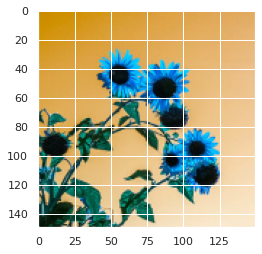

In [4]:
# plotting Features

plt.imshow(features[20])
plt.show()

In [5]:
# Converting Labels and Features into Arrays

features = np.array(features)
labels = np.array(labels)
np.savez_compressed("/content/drive/MyDrive/flowers", features, labels)

In [6]:
labels

array(['sunflower', 'sunflower', 'sunflower', ..., 'rose', 'rose', 'rose'],
      dtype='<U9')

In [7]:
# Normalizing Features

def preprocessing(features, labels):

    features= features.reshape(len(features), 150,150,3)/255.0
    
    # One Hot Encoding Labels
    one_hot = LabelBinarizer()
    labels = one_hot.fit_transform(labels)
    return features, labels, one_hot

In [8]:
# Creating Model

def model():

  # Making Network

 
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150,3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(5, activation='softmax'))
    
  # Compiling Network

    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

  # Summary of the Network

    model.summary()

  # Returning Compiled Network

    return model

In [9]:
x, y, one_hot = preprocessing(features, labels)

In [10]:
# Splitting Test and Trainging Data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42, shuffle=True)

In [11]:
model = model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [12]:
# Training The Model
training_model = model.fit(X_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
21/21 [==============================] - 37s 135ms/step - loss: 8.9398 - accuracy: 0.2319
Epoch 2/20
21/21 [==============================] - 2s 108ms/step - loss: 1.4208 - accuracy: 0.3845
Epoch 3/20
21/21 [==============================] - 2s 107ms/step - loss: 1.1057 - accuracy: 0.5494
Epoch 4/20
21/21 [==============================] - 2s 108ms/step - loss: 0.9658 - accuracy: 0.6205
Epoch 5/20
21/21 [==============================] - 2s 109ms/step - loss: 0.7945 - accuracy: 0.7125
Epoch 6/20
21/21 [==============================] - 2s 109ms/step - loss: 0.6801 - accuracy: 0.7529
Epoch 7/20
21/21 [==============================] - 2s 107ms/step - loss: 0.4729 - accuracy: 0.8381
Epoch 8/20
21/21 [==============================] - 2s 109ms/step - loss: 0.3673 - accuracy: 0.8762
Epoch 9/20
21/21 [==============================] - 2s 109ms/step - loss: 0.3013 - accuracy: 0.9145
Epoch 10/20
21/21 [==============================] - 2s 108ms/step - loss: 0.1980 - accuracy: 0.939

In [14]:
# Defining Accuracy Plot Function

def plot_accuracy(training_model):
  plt.figure(figsize=(10,5))
  plt.plot(training_model.history["accuracy"], label="Accuracy", color = "b")
  plt.plot(training_model.history["loss"], label = "Loss", color = "r")
  plt.xlabel("Epochs")
  plt.legend()
  plt.show()

In [15]:
training_model.history.keys()

dict_keys(['loss', 'accuracy'])

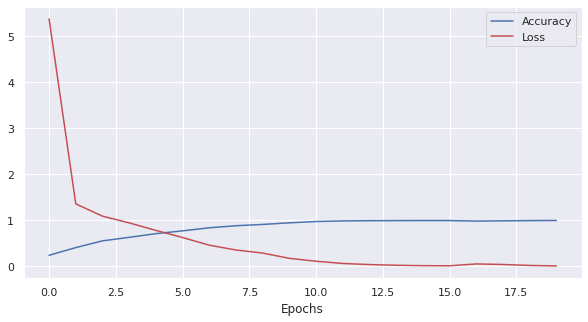

In [16]:
plot_accuracy(training_model)

In [17]:
model.save("FlowerModelClassifier.h5")